In [10]:
from IPython.display import clear_output
from tensorboardX import SummaryWriter
import torch
from torch.autograd import Variable
from torch.distributions import Normal
import math
from numpy import random
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [ ]:
dir = "../../../Main/Datasets/Regression/"

### PLOTTING SCRIPTS

PLOTTING SCRIPT to visualize LL, KL div, and Test Loss on classification 
benchmarks a1a, austrialian scale and MNIST data sets across optimizers 
(noisy adam, noisy kfac, vprop, adam, rmsprop, (should we add newton and SFN?))
We could potentially show how they perform compared to 2nd order methods that
compute the exact Hessian yet don't consider the statistical manifold as the
natural gradient methods do. 

In [46]:
#x-axis
epochs = 100
data_passes = x = [x for x in range(1,epochs)]

In [47]:
#log likelihoods
v_ll     = [x + np.random.normal(0,1) for x in range(1,epochs)]
na_ll    = [x + np.random.normal(0,1)for x in range(1,epochs)]
nkfac_ll = [x + np.random.normal(0,1)for x in range(1,epochs)]

In [48]:
#kl divergence
v_kl     = [x for x in range(1,epochs)]
na_kl    = [x for x in range(1,epochs)]
nkfac_kl = [x for x in range(1,epochs)]  

In [49]:
#test loss
v_tl     = [x for x in range(1,epochs)]
na_tl    = [x for x in range(1,epochs)]
nkfac_tl = [x for x in range(1,epochs)]

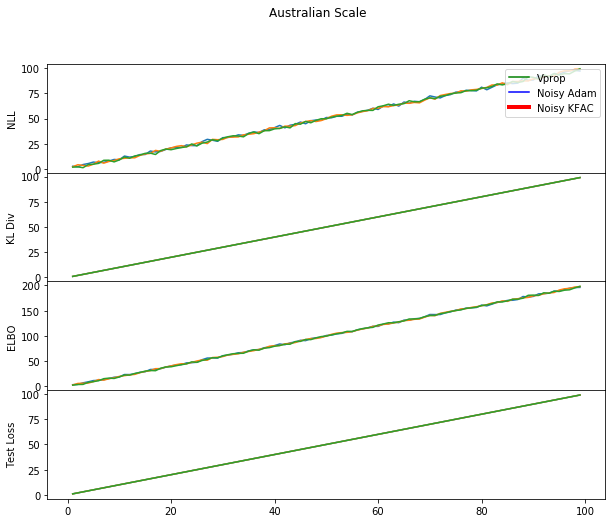

In [72]:
f, axarr = plt.subplots(4, sharex=True, sharey=False, figsize=(10,8))
f.suptitle('Australian Scale')

# y labels
axarr[0].set(ylabel='NLL')
axarr[1].set(ylabel='KL Div')
axarr[2].set(ylabel='ELBO')
axarr[3].set(ylabel='Test Loss')

#log likelihoods
l1 =axarr[0].plot(x, v_ll, label='Vprop')
l2 =axarr[0].plot(x, na_ll, label='Noisy Adam')
l3 =axarr[0].plot(x, nkfac_ll, label='Noisy K-FAC')

#custom legend
custom_lines = [Line2D([0], [0], color='green'), 
                Line2D([0], [0], color='blue'),  
                Line2D([0], [0], color='red', lw=4)]
                       
axarr[0].legend(custom_lines, ['Vprop', 'Noisy Adam', 'Noisy KFAC'], loc='upper right')

#kl divergence
axarr[1].plot(x, v_kl)
axarr[1].plot(x, na_kl)
axarr[1].plot(x, nkfac_kl)

#elbo
axarr[2].plot(x, [x+y for x,y in zip(v_ll,v_kl)])
axarr[2].plot(x, [x+y for x,y in zip(na_ll,na_kl)])
axarr[2].plot(x, [x+y for x,y in zip(nkfac_ll,nkfac_kl)])

#test loss
axarr[3].plot(x, v_tl)
axarr[3].plot(x, na_tl)
axarr[3].plot(x, nkfac_tl)



# Bring subplots close to each other.
f.subplots_adjust(hspace=0)

# Hide x labels and tick labels for all but bottom plot.
for ax in axarr:
    ax.label_outer()
    

plt.show()

### For a Single Model: Diagnostic Plot

In [18]:
def plot_diagnositc(ll, kl, test, epochs):
    num_batches =  len(ll)
    batch_per_epoch = num_batches // epochs
    data_passes  = [x for x in range(1,epochs+1)]
    batch_passes = [x for x in range(1,num_batches+1)]
    f, axarr = plt.subplots(4, sharex=True, sharey=False, figsize=(10,8))
    
    plt.xticks(np.arange(min(batch_passes), max(batch_passes)+1, batch_per_epoch), data_passes)
    
    # y labels
    axarr[0].set(ylabel='NLL')
    axarr[1].set(ylabel='KL Div')
    axarr[2].set(ylabel='ELBO')
    axarr[3].set(ylabel='Test Loss')

    #log likelihoods
    l1 =axarr[0].plot(batch_passes, ll)

    #kl divergence
    axarr[1].plot(batch_passes, kl)

    #elbo
    axarr[2].plot(batch_passes, [x+y for x,y in zip(ll,kl)])


    #test loss
    axarr[3].plot(batch_passes, test)


    # Bring subplots close to each other.
    f.subplots_adjust(hspace=0)

    # Hide x labels and tick labels for all but bottom plot.
    for ax in axarr:
        ax.label_outer()

    
    plt.show()

In [13]:
import numpy as np
num_batches = 100
epochs = 10

ll   =  [x for x in range(1,num_batches+1)]
kl   =  [x for x in range(1,num_batches+1)]
test =  [x for x in range(1,num_batches+1)]

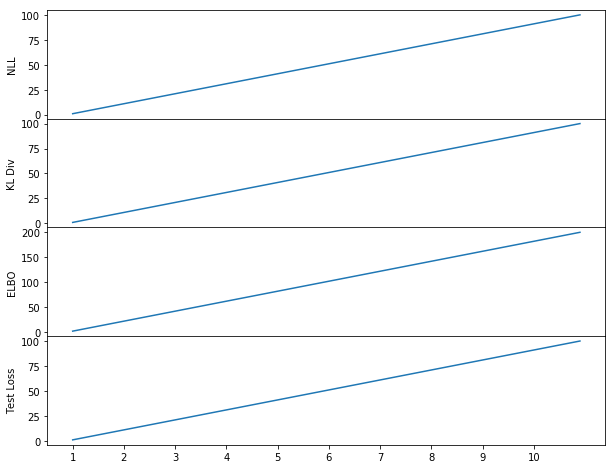

In [20]:
plot_diagnositc(ll, kl, test, epochs)